# List down all possible dimensionality reduction techniques that can be implemented using python

#### Following Dimensionality reduction techniques can be implemented using python, they also can be categorized by the approach of redutcion-

1. Random Forest- Using random forest algorithm helps us to find the importance of each attribute. Using this we can keep the features who have better contribution in decision making and reduce feature who do not impact decision making.

2. Missing value ratio- As the name suggests, feature which have higher number of missing values can be dropped.

3. Low variance filter- We choose these approach we have feature with constant value without much variance. Low variance impacts less on decision making and hence such features can be dropped.

4. High Correlation filter- If the collinearity between two features is high then it results into multi-collinearity of the datasets. So such features can be dropped.

All the above mentioned methods are based on Feature selection approach.

5. Principal component analysis- Most used feature reduction technique for linear data. By computing the variability of each feature from its mean, variance is explained as much as possible to select important features.

6. Factor analysis- This is used when there is high corelation between features. Features are categorized by collinearity of features and assigned with classes.

7. Independent Component Analysis- We can use this method to transform the data into independent components which describe the data using less number of components.

8. ISOMAP- This is non linear dimensionality reduction method. It is a manifold learning algorithm which tries to preserve the geodesic distance between samples while reducing the dimension.

9. t-SNE- t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

10. UMAP- Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

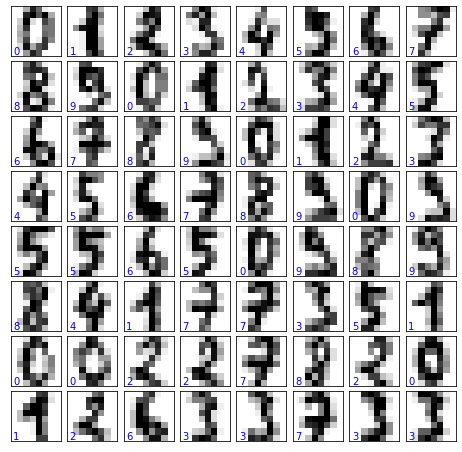

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(8, 8, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='blue')

In [15]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [16]:
y.shape

(1797,)

In [17]:
#transform the data to two dimensions using manifold learning algorithm called Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
projection = iso.transform(X)
projection.shape

(1797, 2)

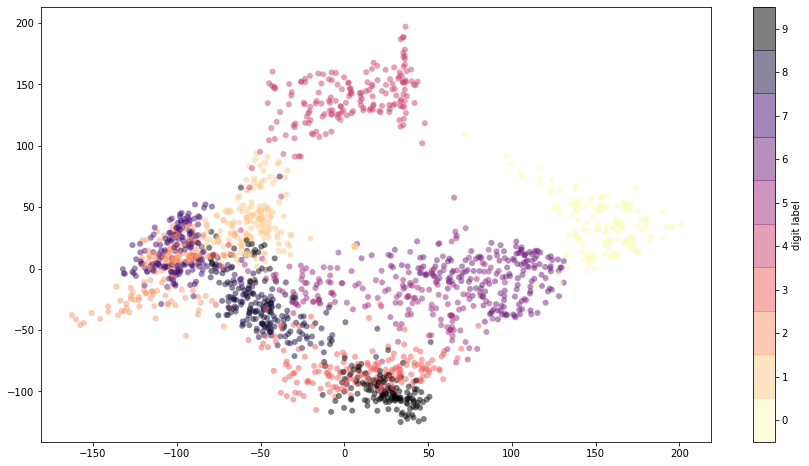

In [21]:
plt.figure(figsize=(15, 8))
plt.scatter(projection[:, 0], projection[:, 1], c=y,edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('magma_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8407407407407408

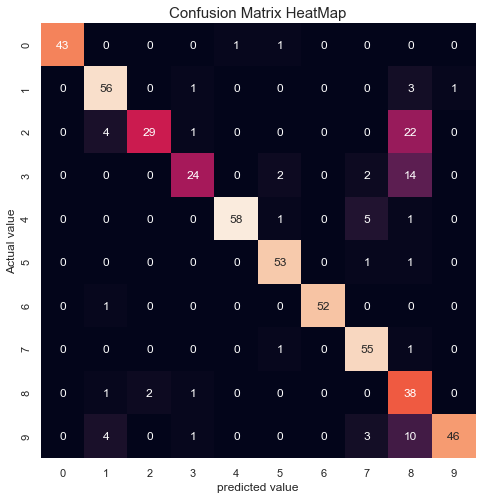

In [28]:
plt.figure(figsize = (12, 8))
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value');
plt.title('Confusion Matrix HeatMap', fontsize = 15);

This shows us which digit can be misclassified as which. Here, 2 was misclassfied as 8 22 times. 3 was misclassified again as 8 14 time and 9 was misclassified as 8 10 times.